## Predict Student Performance from Game Play

# Data

In [106]:
import pandas as pd 
import numpy as np 

In [107]:
sample = pd.read_csv("/kaggle/input/gameplay/sample_submission.csv")


In [108]:
sample.head()

,session_id,correct,session_level
0,20090109393214576_q1,0,20090109393214576_0-4
1,20090312143683264_q1,0,20090312143683264_0-4
2,20090312331414616_q1,0,20090312331414616_0-4
3,20090109393214576_q2,0,20090109393214576_0-4
4,20090312143683264_q2,0,20090312143683264_0-4


In [109]:
train = pd.read_csv("/kaggle/input/train-for-predict-gameplay/train.csv")
test = pd.read_csv("/kaggle/input/gameplay/test.csv")


In [110]:
train_label = pd.read_csv("/kaggle/input/gameplay/train_labels.csv")

In [111]:
train.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4


In [112]:
test.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4,20090109393214576_0-4
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4


In [113]:
train_label.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1


In [114]:
test['index'].unique

<bound method Series.unique of 0          0
1          1
2          2
3          3
4          4
        ... 
3723    1001
3724    1002
3725    1003
3726    1004
3727    1005
Name: index, Length: 3728, dtype: int64>

In [115]:
print(train.shape)
print(test.shape)


(13174211, 20)
(3728, 21)


# review data 

In [116]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [117]:
train['event_name'].unique

<bound method Series.unique of 0           cutscene_click
1             person_click
2             person_click
3             person_click
4             person_click
                 ...      
13174206    navigate_click
13174207    navigate_click
13174208    navigate_click
13174209    navigate_click
13174210        checkpoint
Name: event_name, Length: 13174211, dtype: object>

In [118]:
train['event_name'].describe

<bound method NDFrame.describe of 0           cutscene_click
1             person_click
2             person_click
3             person_click
4             person_click
                 ...      
13174206    navigate_click
13174207    navigate_click
13174208    navigate_click
13174209    navigate_click
13174210        checkpoint
Name: event_name, Length: 13174211, dtype: object>

In [119]:
train['level_group'].unique

<bound method Series.unique of 0             0-4
1             0-4
2             0-4
3             0-4
4             0-4
            ...  
13174206    13-22
13174207    13-22
13174208    13-22
13174209    13-22
13174210    13-22
Name: level_group, Length: 13174211, dtype: object>

In [120]:
train['level_group'].describe

<bound method NDFrame.describe of 0             0-4
1             0-4
2             0-4
3             0-4
4             0-4
            ...  
13174206    13-22
13174207    13-22
13174208    13-22
13174209    13-22
13174210    13-22
Name: level_group, Length: 13174211, dtype: object>

- there was 2 type of main even auto navigation and manualy click 
- level for finish the game from 0 until 22 like [0-4 stage ] - [13-22 stage]

In [121]:
train['session_id'].describe

<bound method NDFrame.describe of 0           20090312431273200
1           20090312431273200
2           20090312431273200
3           20090312431273200
4           20090312431273200
                  ...        
13174206    22100221145014656
13174207    22100221145014656
13174208    22100221145014656
13174209    22100221145014656
13174210    22100221145014656
Name: session_id, Length: 13174211, dtype: int64>

## check valuable columns and missing value

In [122]:
import missingno as msno

<AxesSubplot:>

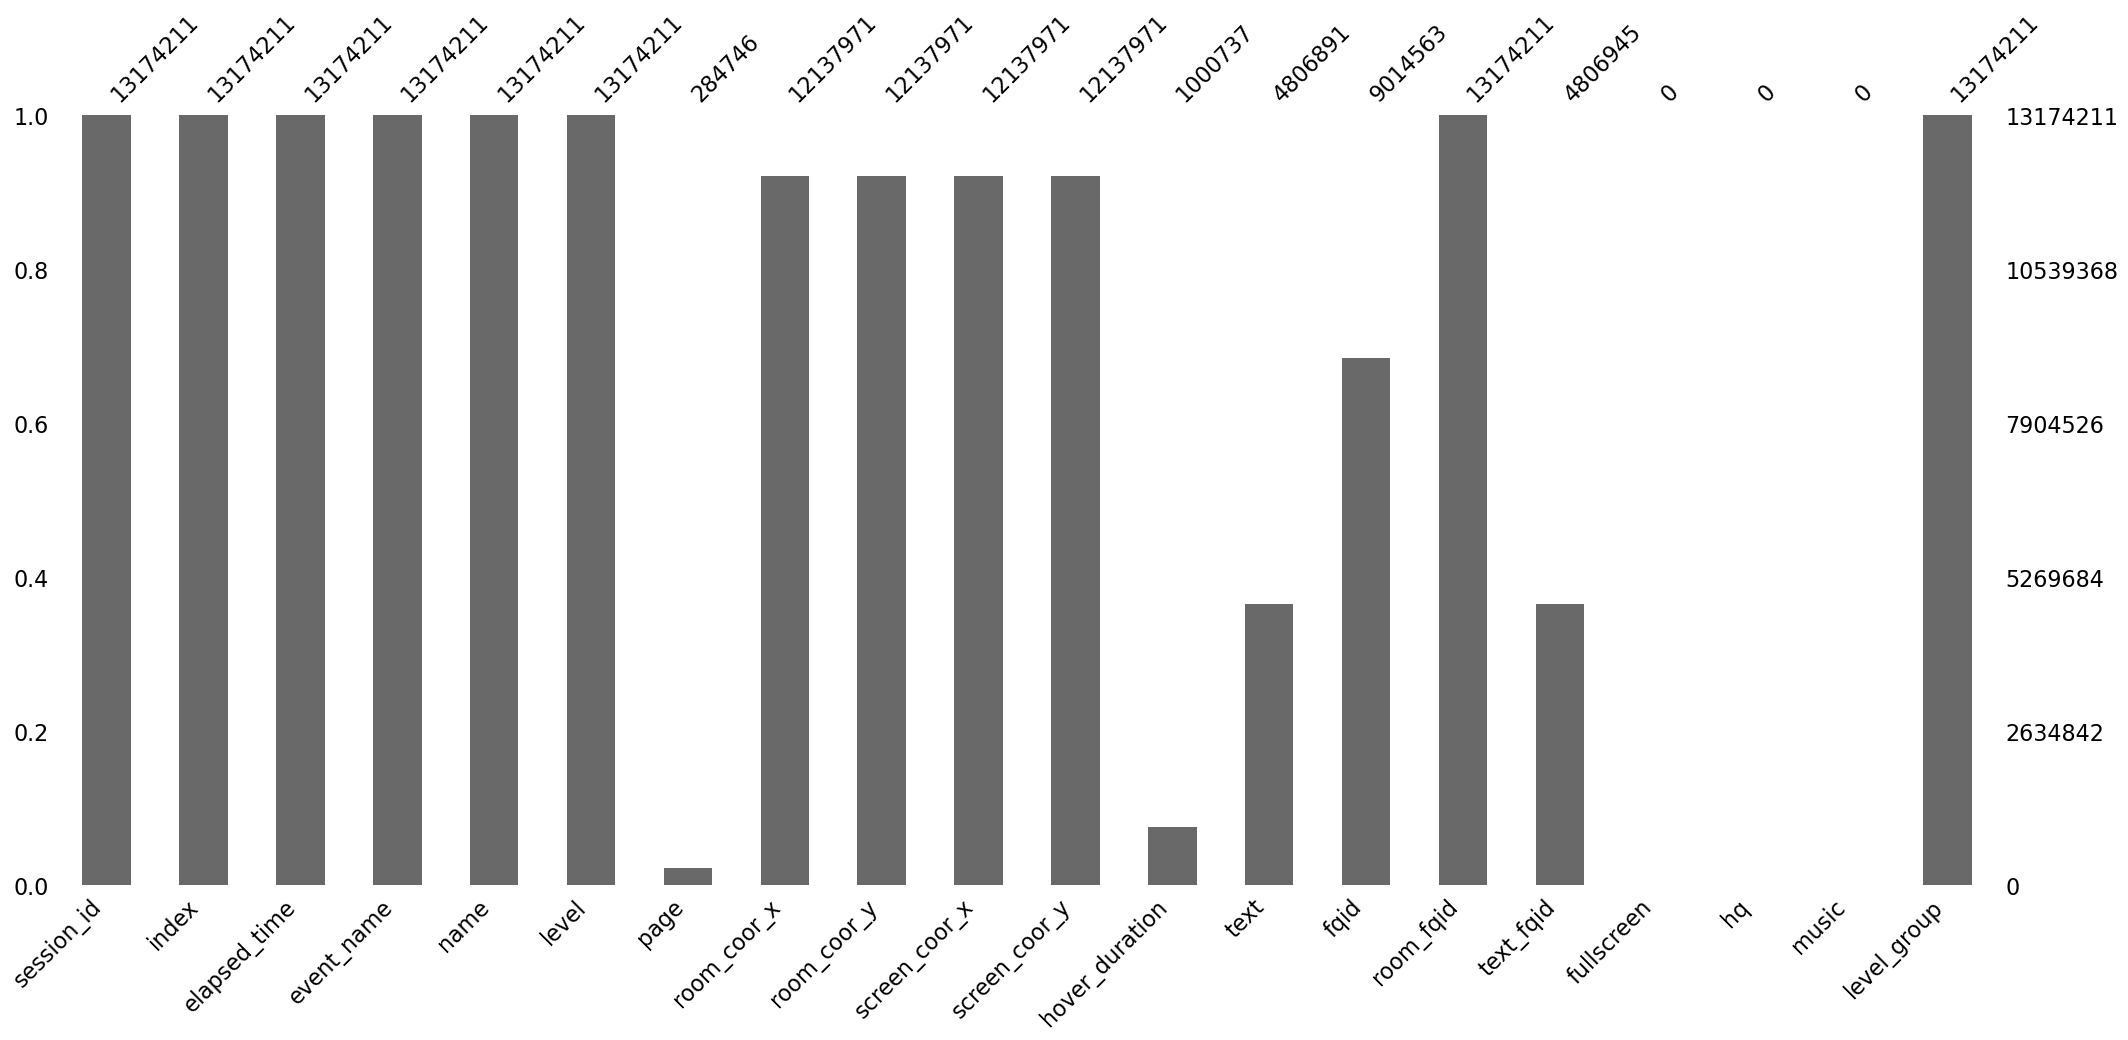

In [123]:
msno.bar(train)

<AxesSubplot:>

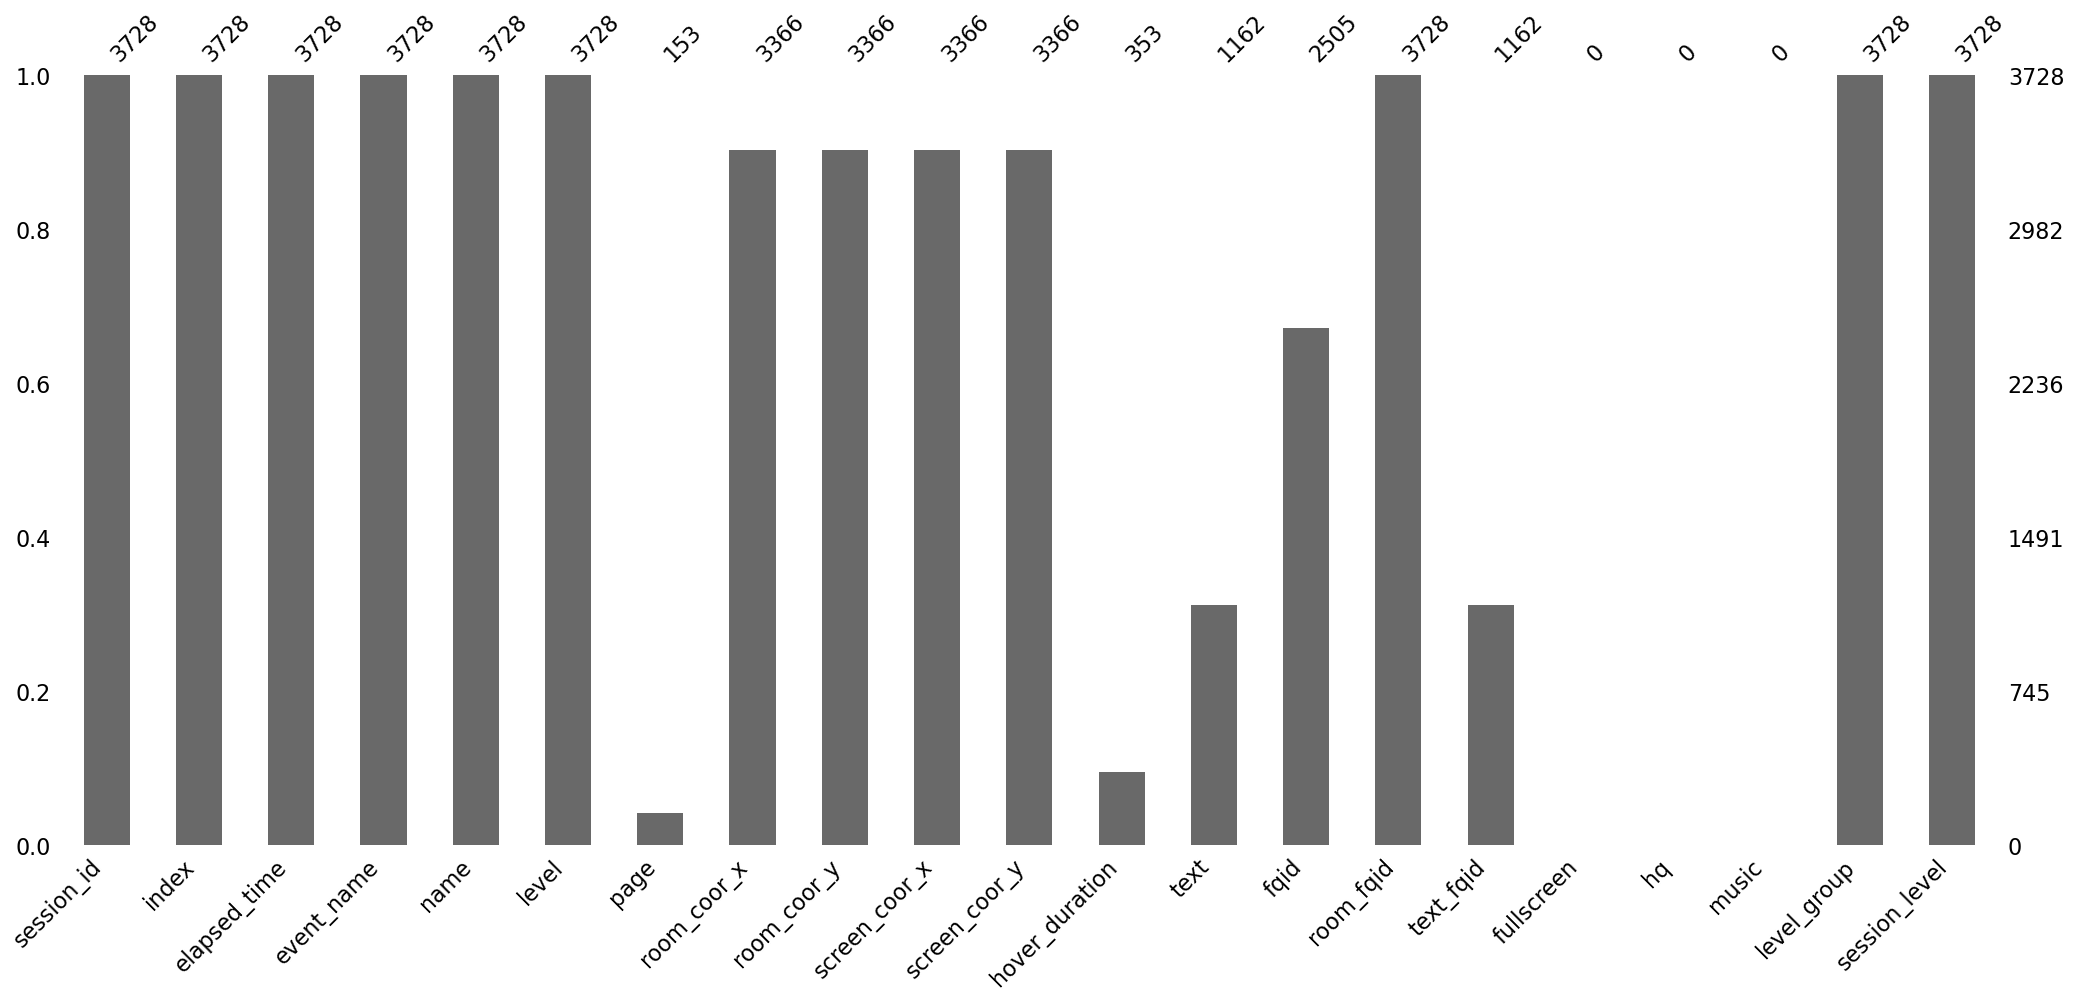

In [124]:
msno.bar(test)

- there was no value at all for column fullscrene hq music so we doesn't need this data because can't representative  the data 

In [125]:
test.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group', 'session_level'],
      dtype='object')

In [126]:
test = test[['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid','level_group', 'session_level']]

<AxesSubplot:>

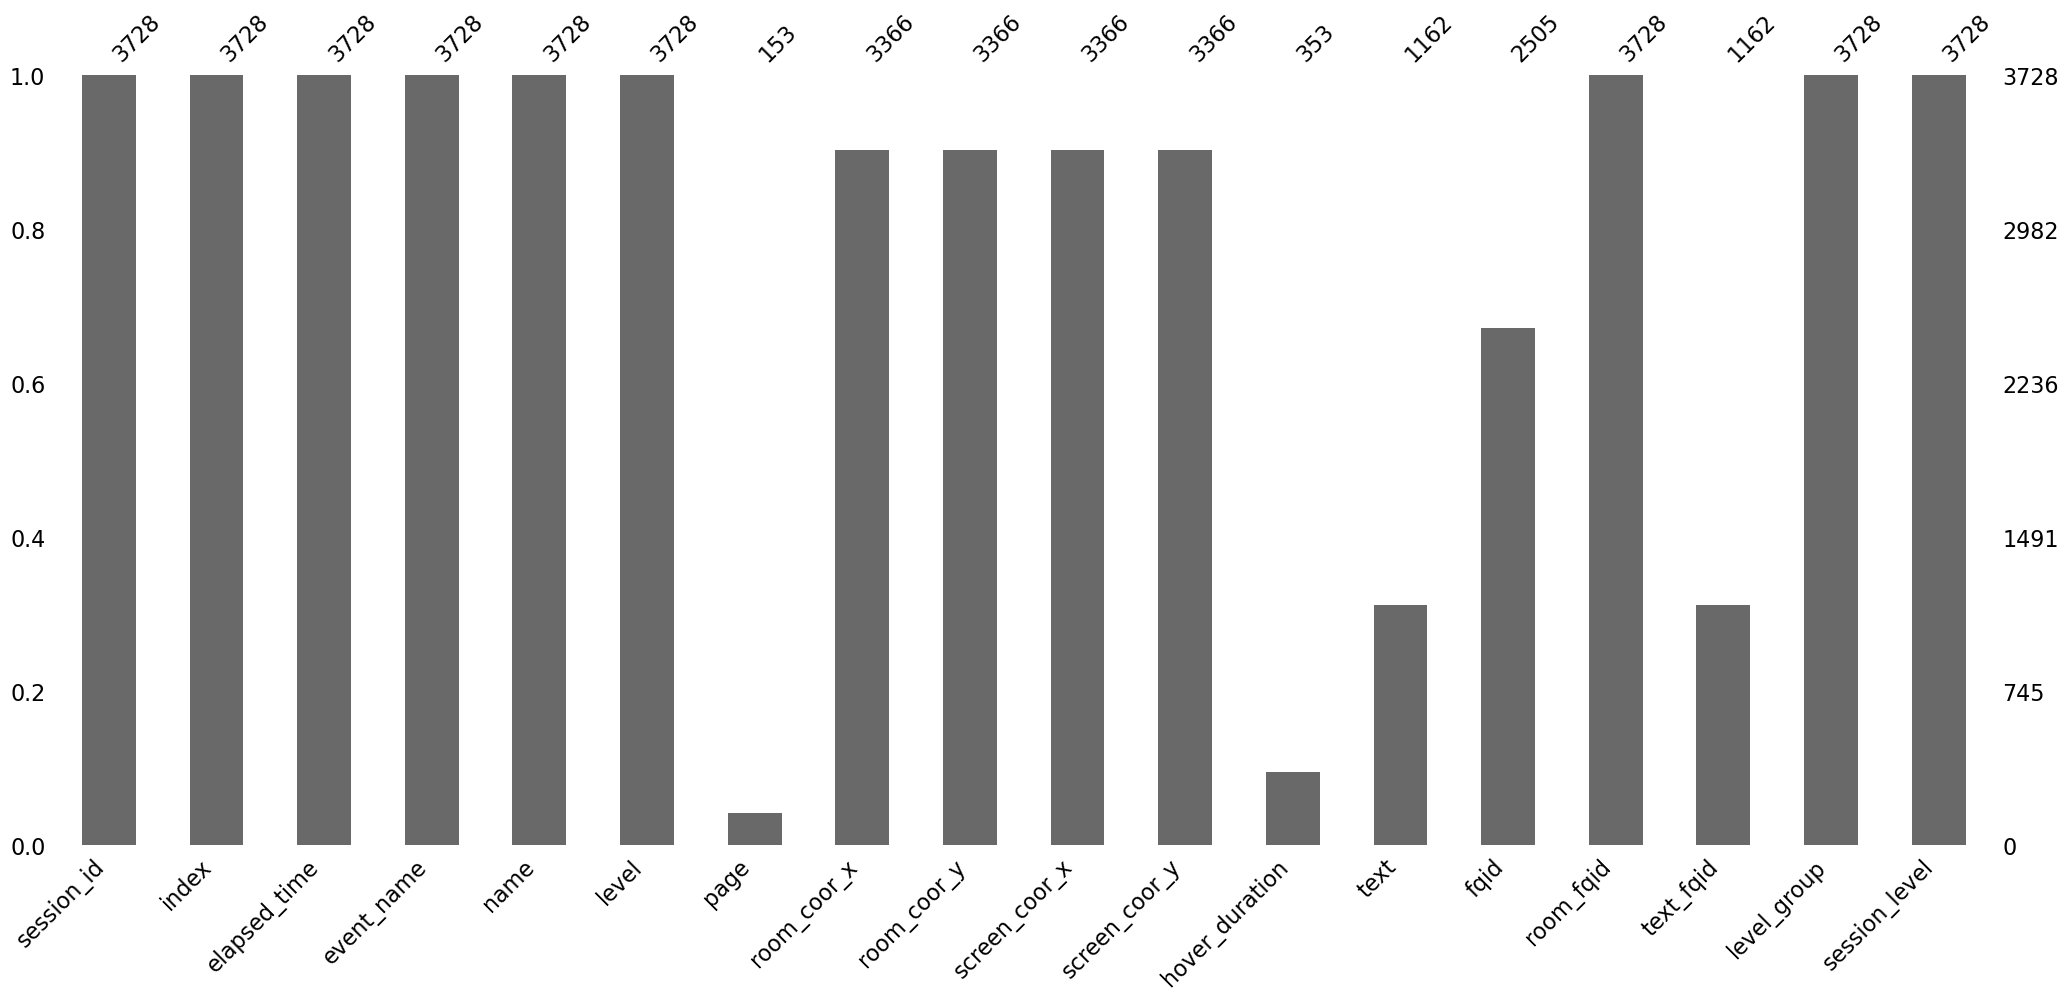

In [127]:
msno.bar(test)

<AxesSubplot:>

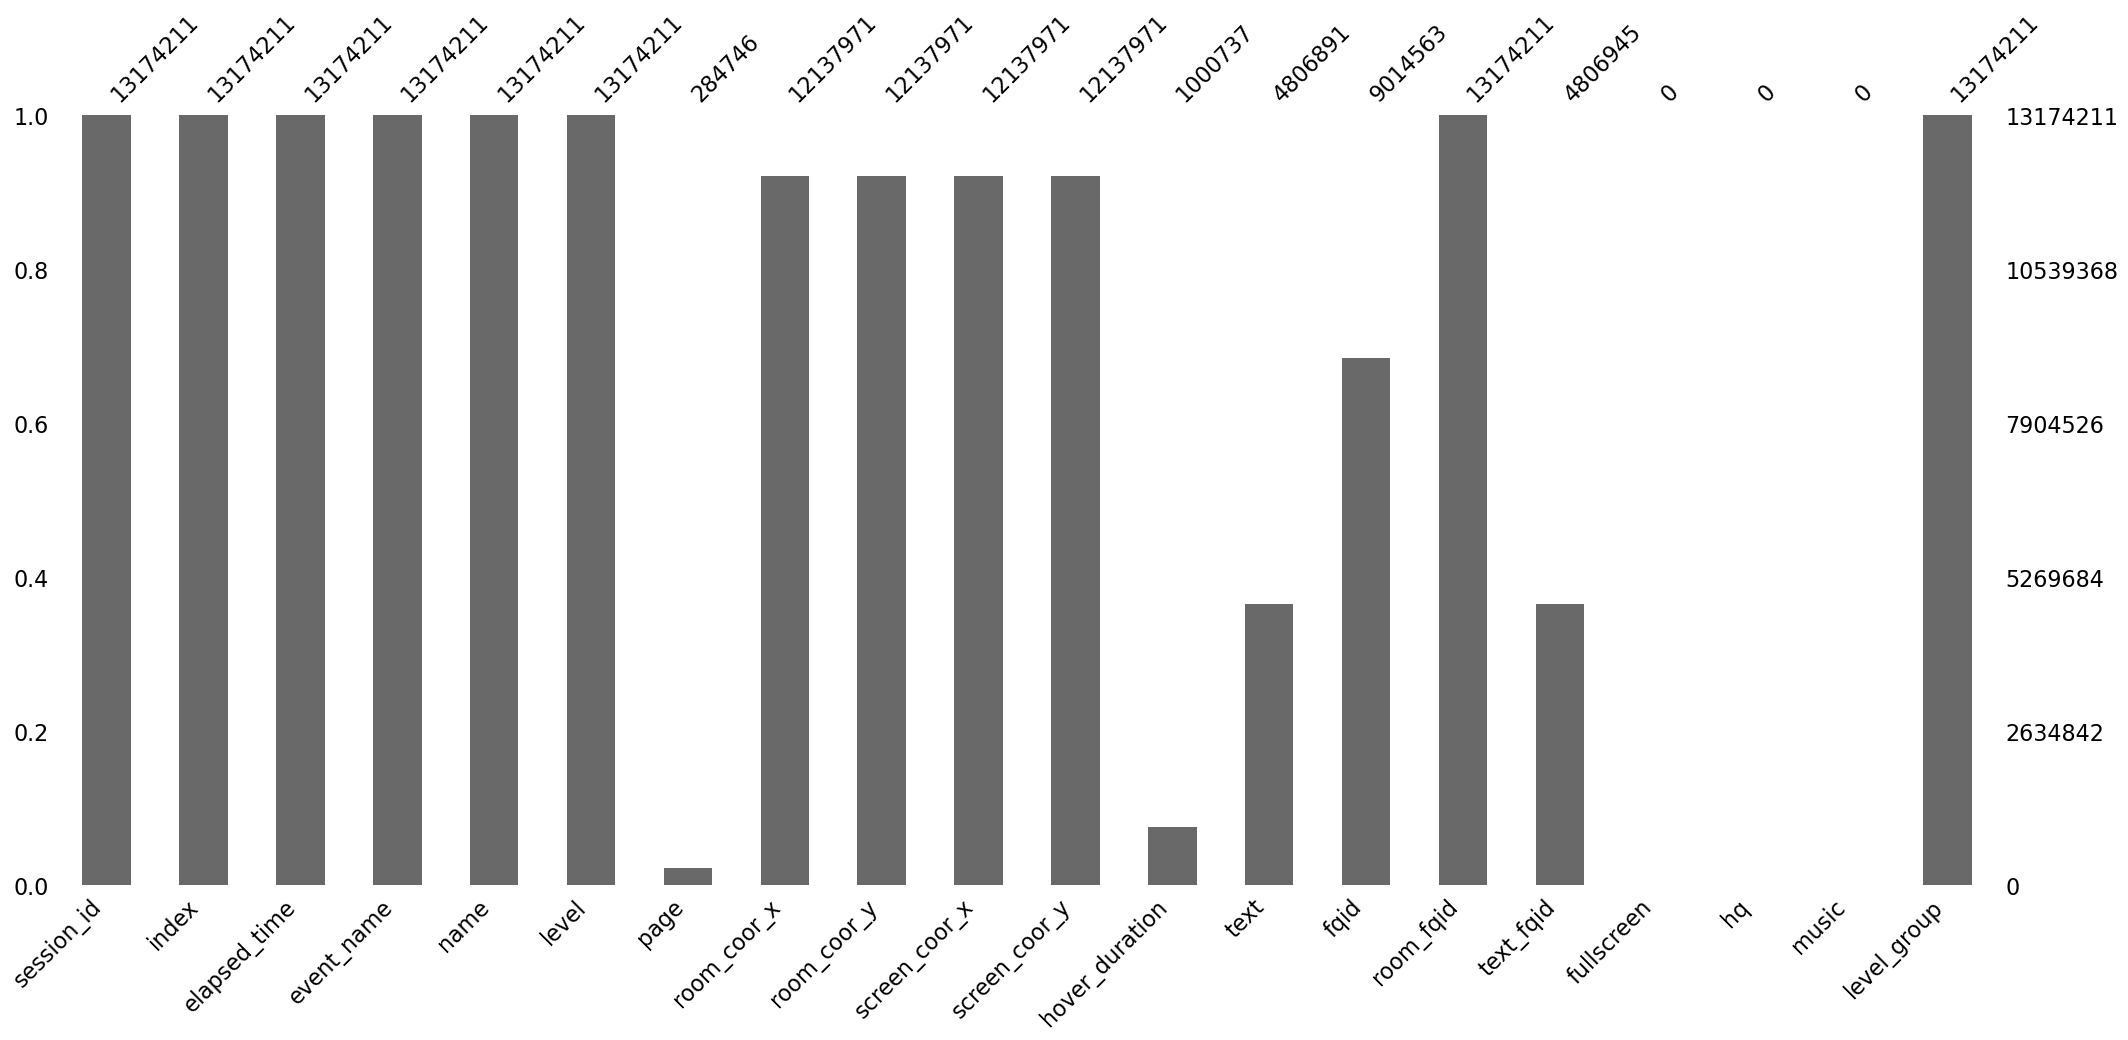

In [128]:
msno.bar(train)

In [129]:
train.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group'],
      dtype='object')

In [130]:
train = train[['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid','level_group']]

<AxesSubplot:>

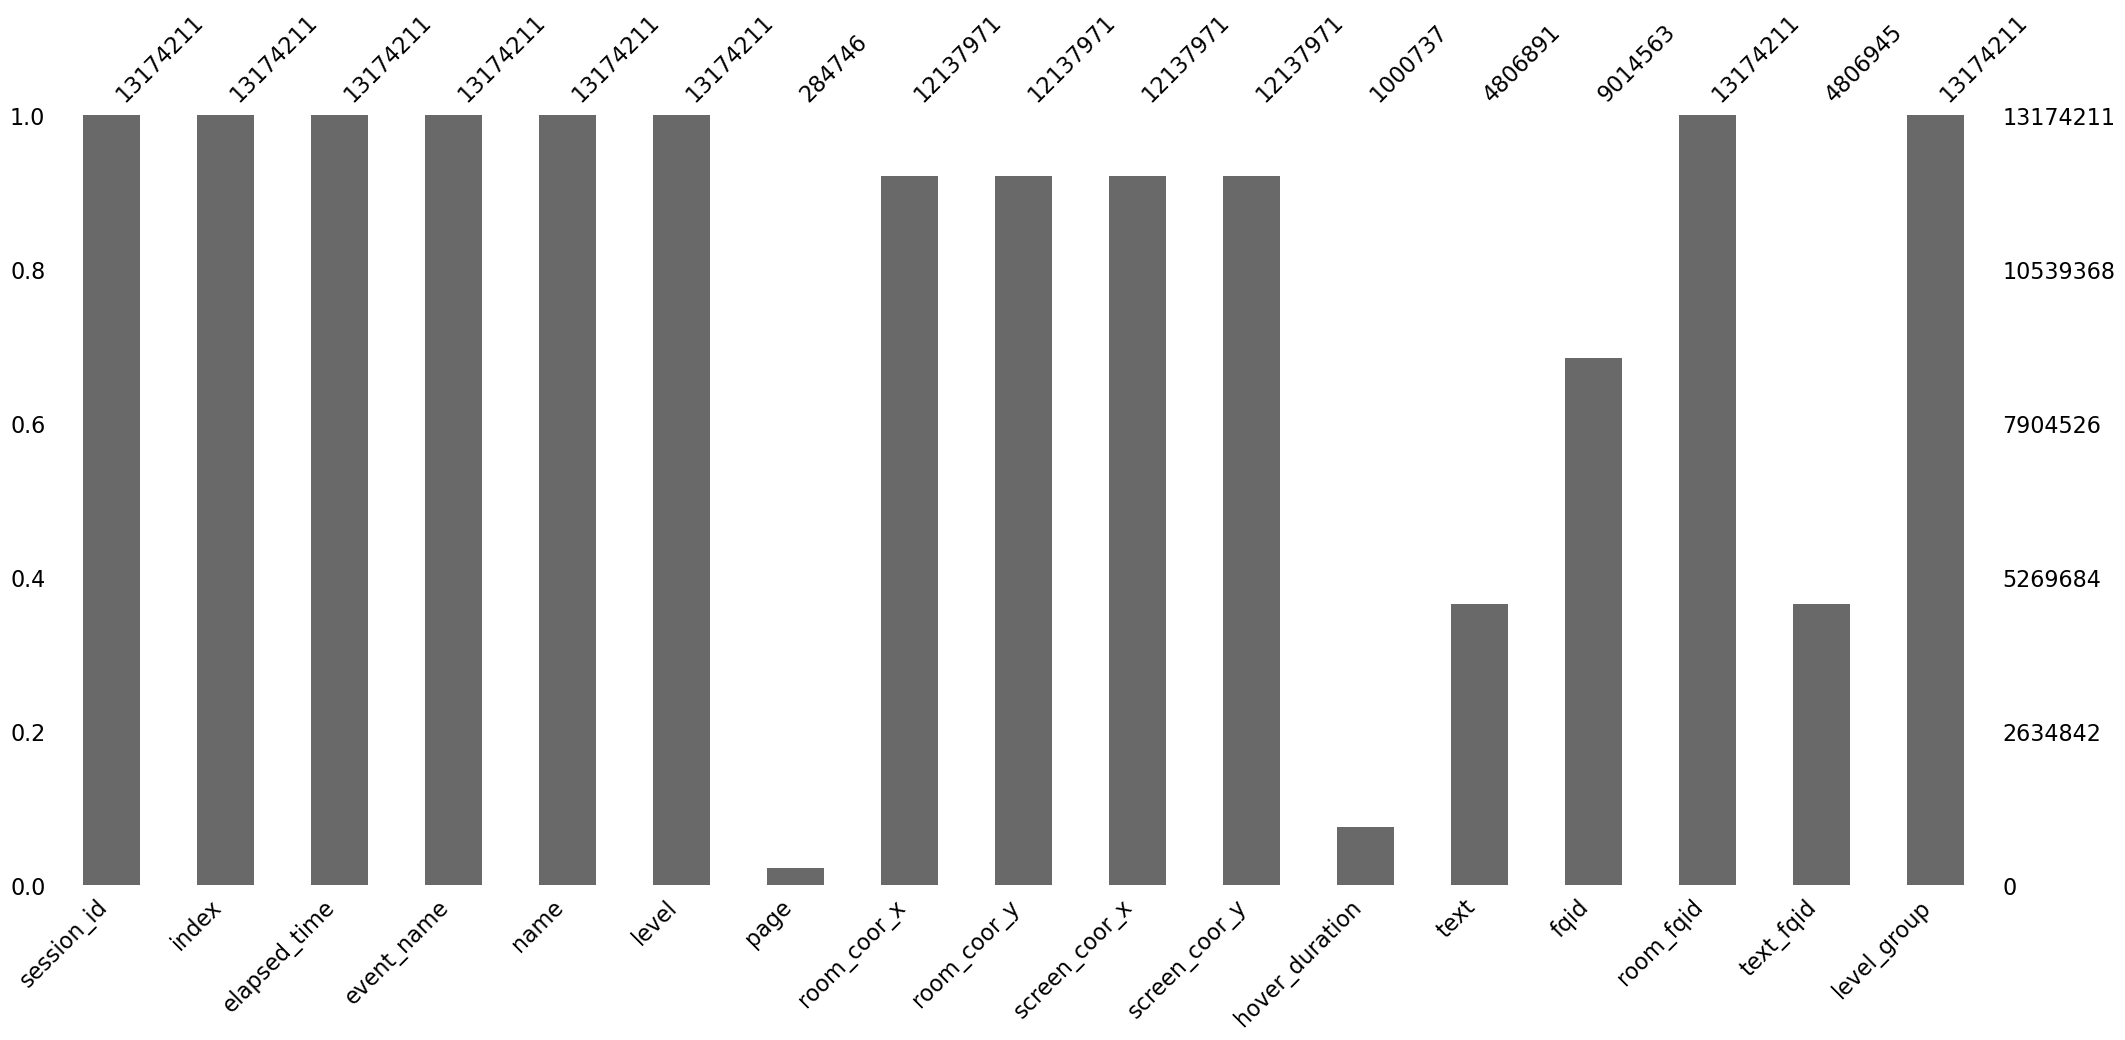

In [131]:
msno.bar(train)

# preprocessing

In [132]:
#preprocess 
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

#encorsing 
from sklearn.compose import ColumnTransformer


In [133]:
test.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'level_group', 'session_level'],
      dtype='object')

In [134]:
test['index'].unique

<bound method Series.unique of 0          0
1          1
2          2
3          3
4          4
        ... 
3723    1001
3724    1002
3725    1003
3726    1004
3727    1005
Name: index, Length: 3728, dtype: int64>

In [135]:
onehot = OneHotEncoder()
onehot_var = ['level']

In [136]:
transformer = ColumnTransformer([('one hot',onehot,onehot_var)],remainder= 'passthrough'

            )

In [137]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(), ['level'])])

In [138]:
test_encoded = pd.DataFrame(transformer.fit_transform(test))
test_encoded.columns= transformer.get_feature_names()
test_encoded

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,one hot__x0_0,one hot__x0_1,one hot__x0_2,one hot__x0_3,one hot__x0_4,one hot__x0_5,one hot__x0_6,one hot__x0_7,one hot__x0_8,one hot__x0_9,...,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group,session_level
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.685314,380.0,259.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4,20090109393214576_0-4
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-63.314686,688.0,398.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4,20090109393214576_0-4
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.685314,375.0,287.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4,20090109393214576_0-4
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-57.314686,683.0,392.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4,20090109393214576_0-4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-57.314686,683.0,392.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4,20090109393214576_0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,13-22,20090312331414616_13-22
3724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,13-22,20090312331414616_13-22
3725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.880047,456.0,332.0,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,13-22,20090312331414616_13-22
3726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.216178,383.0,272.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22,20090312331414616_13-22


- visualisation student

In [139]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [140]:
test_encoded.columns

Index(['one hot__x0_0', 'one hot__x0_1', 'one hot__x0_2', 'one hot__x0_3',
       'one hot__x0_4', 'one hot__x0_5', 'one hot__x0_6', 'one hot__x0_7',
       'one hot__x0_8', 'one hot__x0_9', 'one hot__x0_10', 'one hot__x0_11',
       'one hot__x0_12', 'one hot__x0_13', 'one hot__x0_14', 'one hot__x0_15',
       'one hot__x0_16', 'one hot__x0_17', 'one hot__x0_18', 'one hot__x0_19',
       'one hot__x0_20', 'one hot__x0_21', 'one hot__x0_22', 'session_id',
       'index', 'elapsed_time', 'event_name', 'name', 'page', 'room_coor_x',
       'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration',
       'text', 'fqid', 'room_fqid', 'text_fqid', 'level_group',
       'session_level'],
      dtype='object')

In [141]:
test.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'level_group', 'session_level'],
      dtype='object')

In [142]:
train_label.columns

Index(['session_id', 'correct'], dtype='object')

<AxesSubplot:>

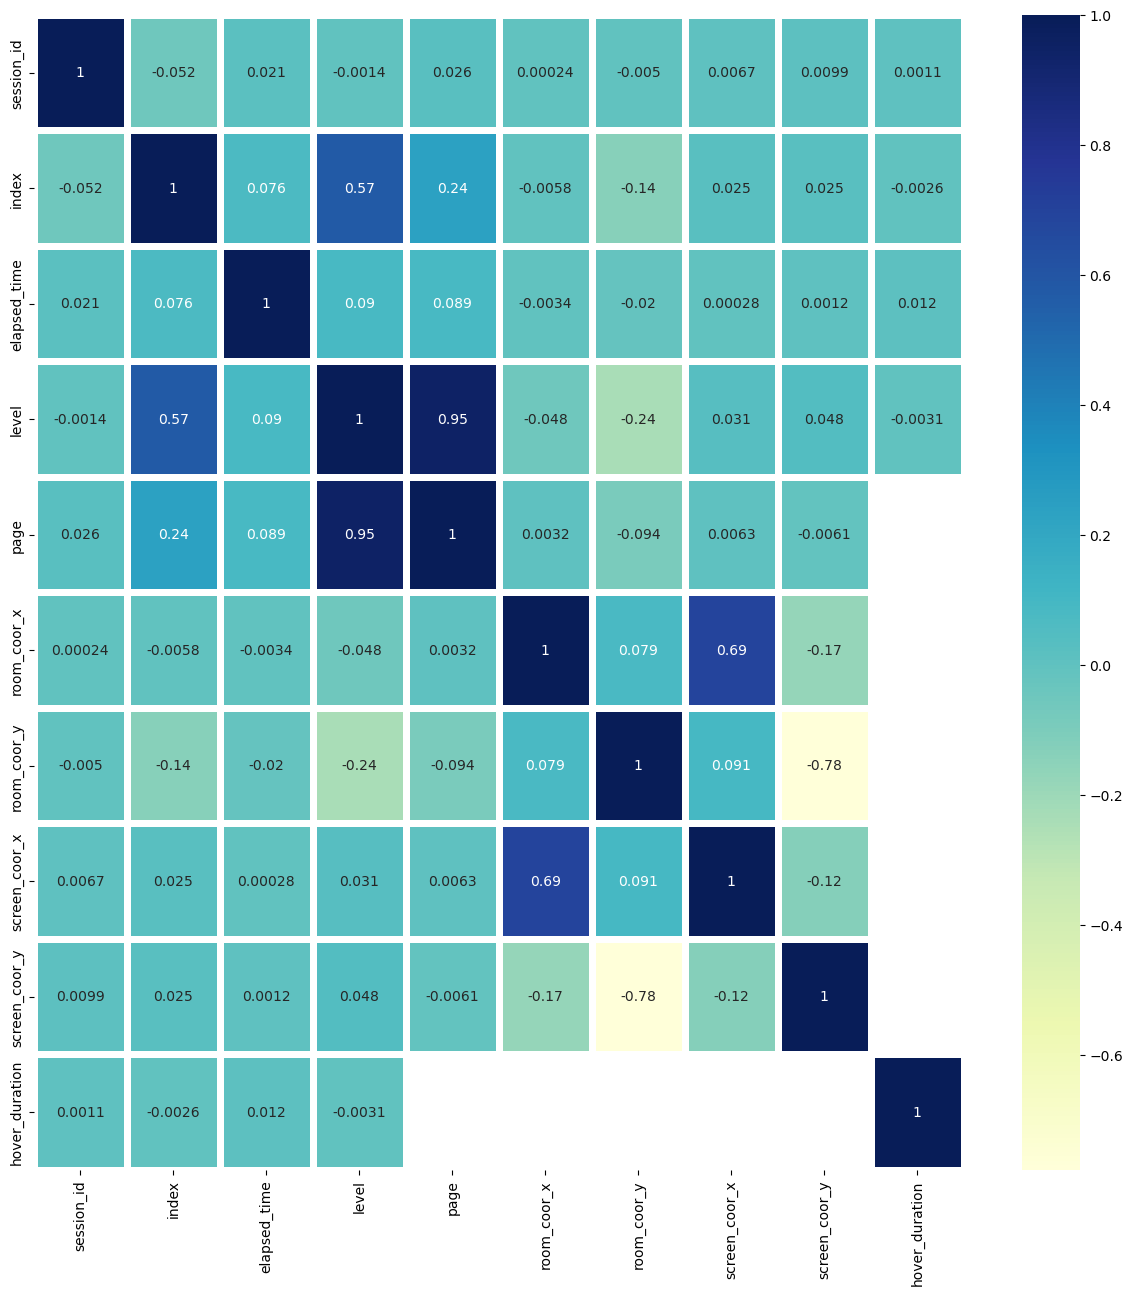

In [143]:
fig,ax =plt.subplots (figsize = (15,15))
sns.heatmap(train.corr(),annot = True , cmap = 'YlGnBu', linewidths= 5 , ax=ax)

<AxesSubplot:title={'center':'Correct_rate'}, ylabel='correct'>

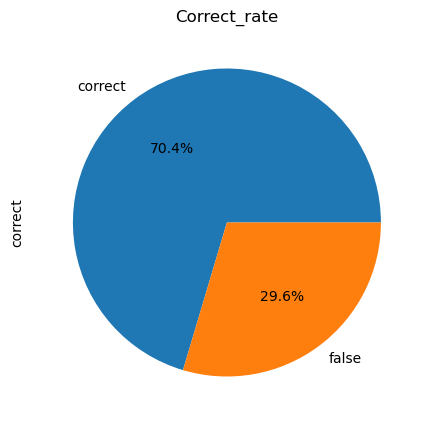

In [144]:
plt.figure(figsize=(5,5))
plt.title('Correct_rate')
(train_label['correct'].value_counts(normalize=True)*100).plot.pie(labels = ["correct", "false"], autopct='%1.1f%%')

<AxesSubplot:xlabel='page', ylabel='index'>

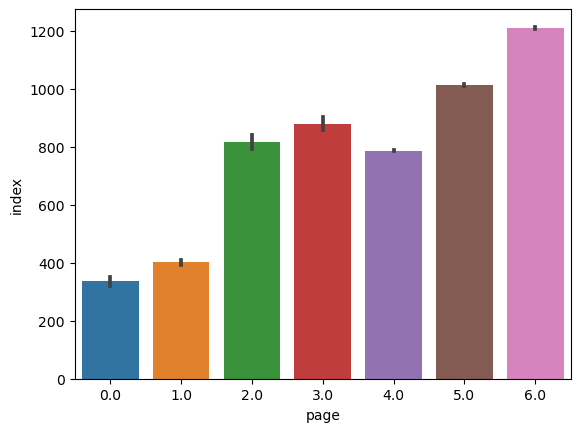

In [145]:
sns.barplot(x='page',y='index',data=train)

In [146]:
train.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'level_group'],
      dtype='object')

<AxesSubplot:xlabel='name', ylabel='index'>

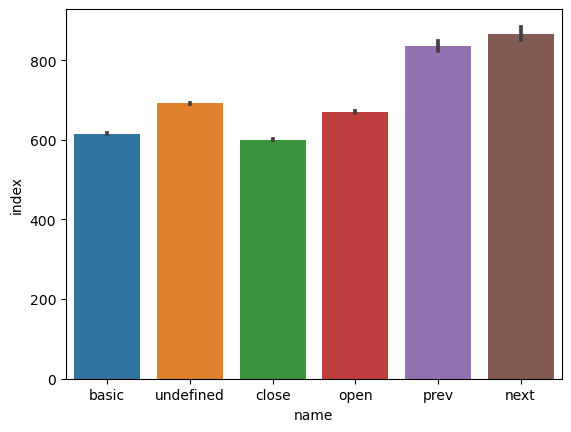

In [147]:
sns.barplot (x='name',y='index',data=train)

<AxesSubplot:xlabel='name', ylabel='index'>

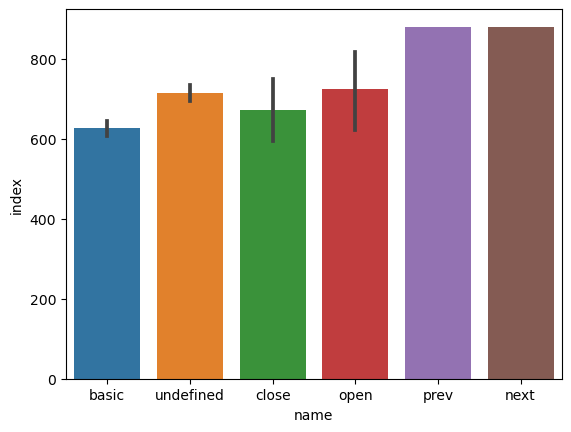

In [148]:
sns.barplot(x='name',y='index',data=test_encoded)

<AxesSubplot:xlabel='index', ylabel='event_name'>

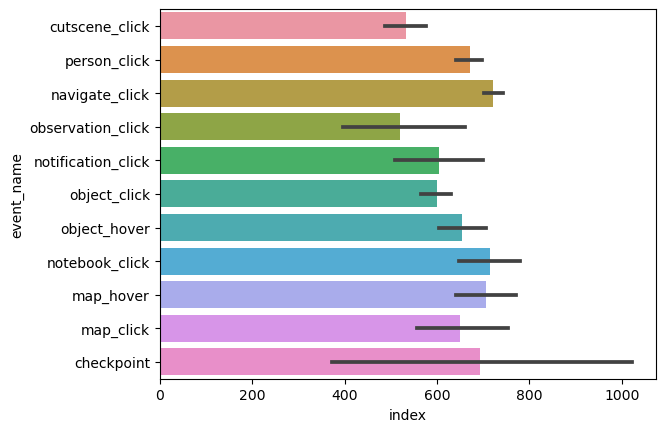

In [149]:
sns.barplot(x='index',y='event_name',data=test)

<AxesSubplot:xlabel='level', ylabel='elapsed_time'>

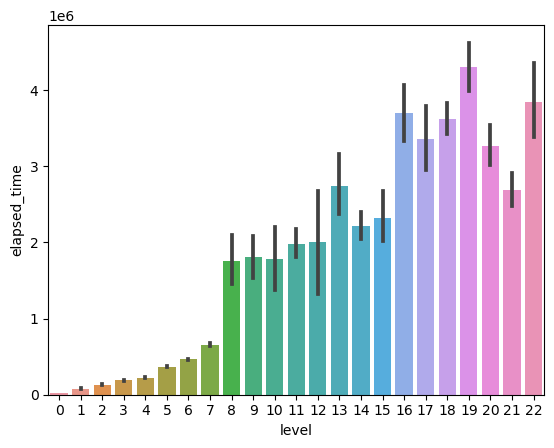

In [150]:
sns.barplot(x='level',y='elapsed_time',data=test)


- from the diagram we can see that the audience or player can complete lv 1 with shorten time and take more time to complete lv 19 

In [151]:
score= train_label['correct'].sort_values( ascending=True)

In [152]:
fig = make_subplots(rows=1, cols=1)
fig.append_trace(go.Bar(
    x=test["level"],
    y=test["index"],
    name="trial and error",
), row=1, col=1)
fig.update_layout(height=600, width=900, title_text="Trial and error at every level")
fig.update_layout(
paper_bgcolor = " #f2f2f2",
plot_bgcolor = " yellowgreen",
font=dict(family='sans-serif',
                  color='black',
                  size=10),)
fig.show()

- from diagram we can see that the easyiest level that they can conquer at level 4 many player doesnt need trial and eror at this level but in other hand the hardest level was at lv 18 because many player try another chance for complete this level 

In [153]:
test_encoded.columns

Index(['one hot__x0_0', 'one hot__x0_1', 'one hot__x0_2', 'one hot__x0_3',
       'one hot__x0_4', 'one hot__x0_5', 'one hot__x0_6', 'one hot__x0_7',
       'one hot__x0_8', 'one hot__x0_9', 'one hot__x0_10', 'one hot__x0_11',
       'one hot__x0_12', 'one hot__x0_13', 'one hot__x0_14', 'one hot__x0_15',
       'one hot__x0_16', 'one hot__x0_17', 'one hot__x0_18', 'one hot__x0_19',
       'one hot__x0_20', 'one hot__x0_21', 'one hot__x0_22', 'session_id',
       'index', 'elapsed_time', 'event_name', 'name', 'page', 'room_coor_x',
       'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration',
       'text', 'fqid', 'room_fqid', 'text_fqid', 'level_group',
       'session_level'],
      dtype='object')

In [154]:
test_encoded.rename(columns={"one hot__x0_0": "level 1", "one hot__x0_1": "level 2",
                                "one hot__x0_2":"level 3","one hot__x0_4":"level 4","one hot__x0_5":"level 5","one hot__x0_6":"level 6","one hot__x0_7":"level 7",
                                "one hot__x0_8":"level 8","one hot__x0_9":"level 9","one hot__x0_10":"level 10","one hot__x0_11":"level 11","one hot__x0_12":"level 12","one hot__x0_13":"level 13",
                                "one hot__x0_14":"level 14","one hot__x0_15":"level 15","one hot__x0_16":"level 16","one hot__x0_17":"level 17","one hot__x0_18":"level 18","one hot__x0_19":"level 19",
                                "one hot__x0_20":"level 20","one hot__x0_21":"level 21","one hot__x0_22":"level 22"
                                })

,level 1,level 2,level 3,one hot__x0_3,level 4,level 5,level 6,level 7,level 8,level 9,...,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group,session_level
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.685314,380.0,259.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4,20090109393214576_0-4
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-63.314686,688.0,398.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4,20090109393214576_0-4
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.685314,375.0,287.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4,20090109393214576_0-4
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-57.314686,683.0,392.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4,20090109393214576_0-4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-57.314686,683.0,392.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4,20090109393214576_0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,13-22,20090312331414616_13-22
3724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,13-22,20090312331414616_13-22
3725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.880047,456.0,332.0,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,13-22,20090312331414616_13-22
3726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.216178,383.0,272.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22,20090312331414616_13-22


In [155]:
train_label

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1
...,...,...
212017,22100215342220508_q18,1
212018,22100215460321130_q18,1
212019,22100217104993650_q18,1
212020,22100219442786200_q18,1


In [157]:
train_label['question'] = train_label['session_id'].apply(lambda x: int(x.split('_')[1][1:]))


In [158]:
train_label

,session_id,correct,question
0,20090312431273200_q1,1,1
1,20090312433251036_q1,0,1
2,20090314121766812_q1,1,1
3,20090314363702160_q1,1,1
4,20090314441803444_q1,1,1
...,...,...,...
212017,22100215342220508_q18,1,18
212018,22100215460321130_q18,1,18
212019,22100217104993650_q18,1,18
212020,22100219442786200_q18,1,18


In [159]:
mean_correct = train_label['correct'].sum()/212022

In [160]:
mean_correct

0.7039458169435248

- the avarage of student that answer the question was 70 % 

<AxesSubplot:xlabel='question', ylabel='correct'>

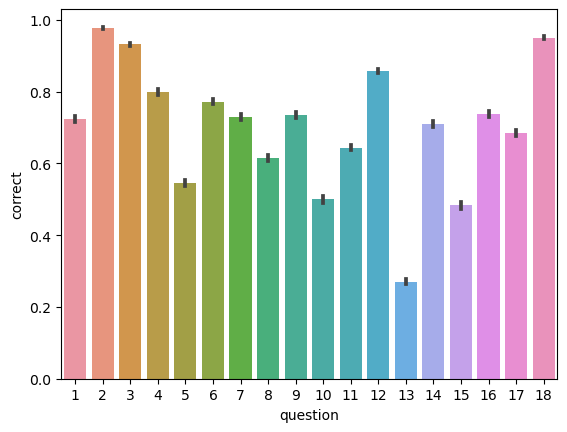

In [161]:
sns.barplot(x='question',y='correct', data=train_label)

- from this diagram we can see that the question 13 was dificult for student because only 20 % STUDENT was correct at this question maybe if question number 13 must be include at the game for the tips we can replace to question 18 for the anticlimacs 

In [162]:
train['text']

0                               undefined
1           Whatcha doing over there, Jo?
2                  Just talking to Teddy.
3              I gotta run to my meeting!
4                     Can I come, Gramps?
                        ...              
13174206                              NaN
13174207                              NaN
13174208                              NaN
13174209                              NaN
13174210                              NaN
Name: text, Length: 13174211, dtype: object

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

In [171]:
word_sample = ['fun learn fun ' , 'car do all day' , 'hate feel ']
vect = CountVectorizer()
vect.fit(word_sample)

CountVectorizer()

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [179]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'word':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['word']
    kamus.drop('word', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [180]:
train['text']

0                               undefined
1           Whatcha doing over there, Jo?
2                  Just talking to Teddy.
3              I gotta run to my meeting!
4                     Can I come, Gramps?
                        ...              
13174206                              NaN
13174207                              NaN
13174208                              NaN
13174209                              NaN
13174210                              NaN
Name: text, Length: 13174211, dtype: object

In [182]:
df_kamus = kamus(test['text'])

<AxesSubplot:ylabel='word'>

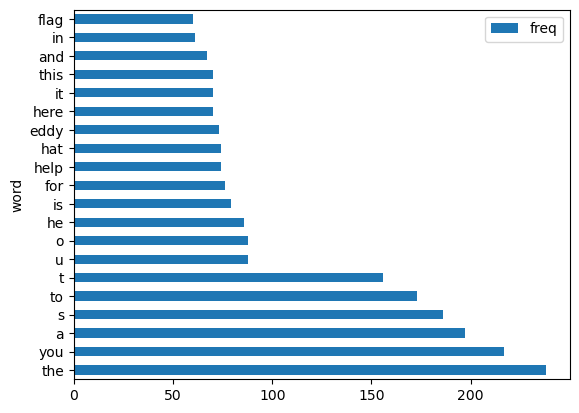

In [183]:
df_kamus[:20].plot(kind='barh')

# there was frequens from students chat by text at sample 

In [184]:


def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [185]:
from wordcloud import WordCloud

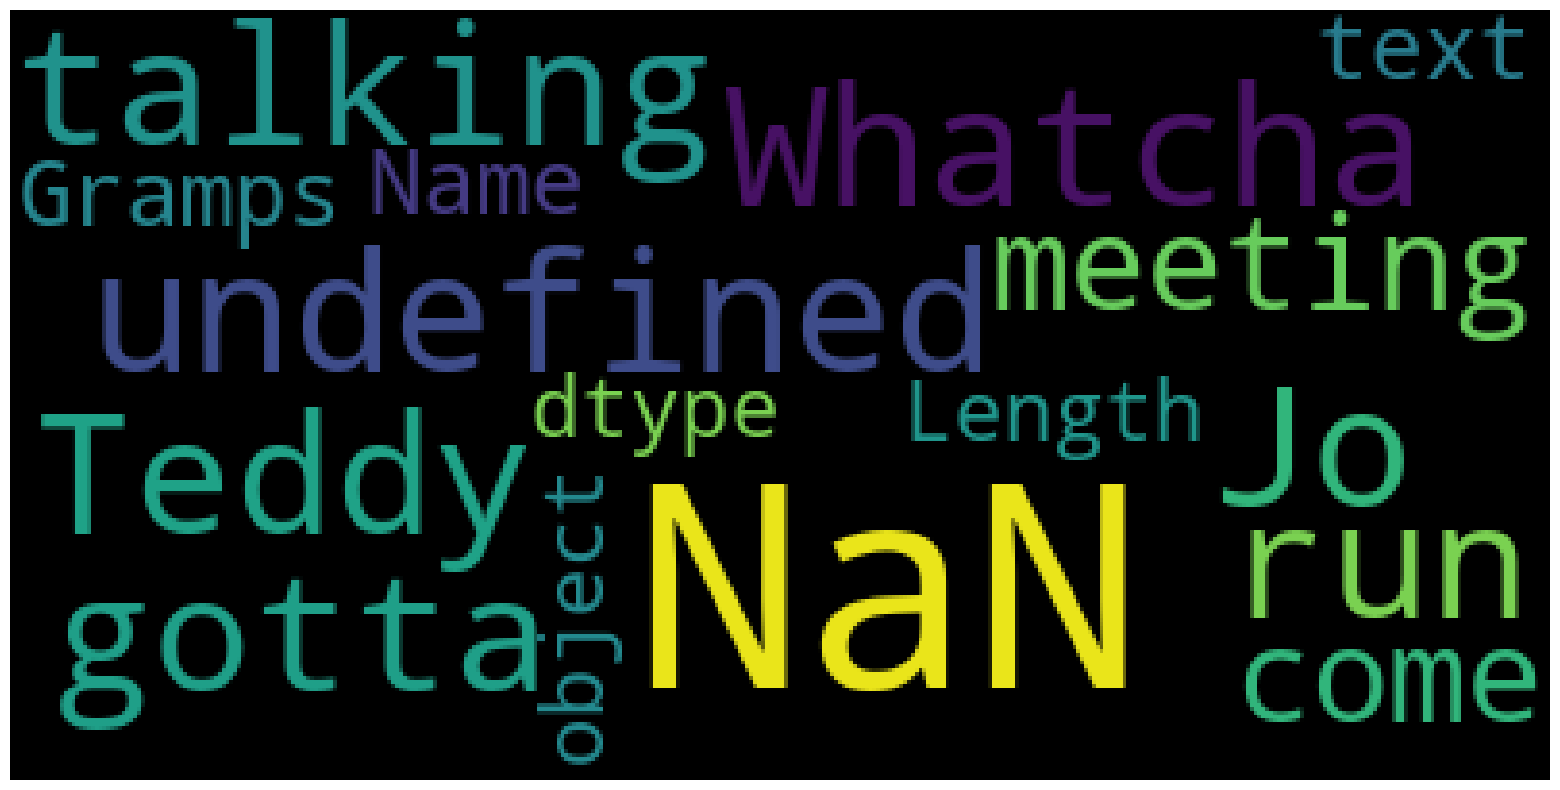

In [186]:
word_cloud = WordCloud().generate(str(test['text']))
plot_cloud(word_cloud)

-from the immage the bigger text was the most frequens at sample test students text at the game